In [2]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MultipleLocator, FormatStrFormatter 
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)
import matplotlib

In [3]:
font_set

In [4]:
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False     
# 设置标题大小
plt.rcParams['font.size'] = '16'
#解决画多幅图时出现图形部分重叠
fig = plt.figure()

<Figure size 864x576 with 0 Axes>

In [5]:
matplotlib.rcParams.update(
{
'text.usetex': False,
'font.family': 'stixgeneral',
'mathtext.fontset': 'stix',
}
)
myfont = FontProperties(fname='/home/linuxidc/.local/share/fonts/文泉驿正黑.ttf')

In [6]:
font_set = FontProperties(fname=r"/System/Library/Fonts/PingFang.ttc", size=15)
font_set


In [7]:
font_set2 = FontProperties(fname='/usr/share/fonts/STKAITI.TTF',size=15)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']


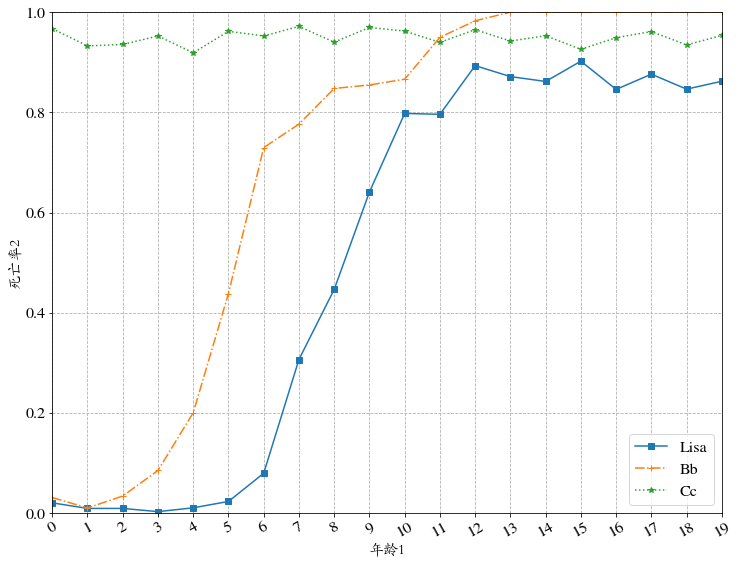

In [8]:
names = range(0,20,1)

names = [str(x) for x in list(names)]

print(names)
x = range(len(names))
# y=[pow(10,i) for i in range(-5,1)]

# 可以用numpy的矩阵或者list直接赋值给abc，例如一个一行N列的矩阵matrix，a=matrix
a=[0.02083,0.00974,0.00974,0.00333,0.01091,0.02365,0.07986,0.3069,0.44674,0.64103,0.79791,0.79618,0.89333,0.87147,0.86174,0.90221,0.84588,0.87633,0.84641,0.86218]
b=[0.03147,0.01071,0.03448,0.08553,0.20064,0.4386,0.72973,0.77663,0.84775,0.85473,0.86624,0.94983,0.98276,1,1,1,1,1,1,1]
c=[0.96711,0.93269,0.93559,0.95254,0.91892,0.96181,0.95255,0.97163,0.9402,0.96949,0.96233,0.93972,0.96516,0.94237,0.95302,0.92593,0.94904,0.9614,0.93464,0.95364]

# linestyle: 实线-虚线-- 点线：点横线-. 
      
plt.plot(x, a,linestyle='-',marker='s',label=u'Lisa')
plt.plot(x, b, linestyle='-.',marker='+',label=u'Bb')
plt.plot(x, c,  linestyle=':',marker='*',label=u'Cc')

plt.grid(linestyle='-.')  

plt.ylim(0,1)    # 设置x轴的刻度从2到10
plt.grid(ls='--') 
plt.grid(True)
plt.legend()  # 让图例生效
plt.xticks(x, names, rotation=29)

plt.margins(0)
plt.subplots_adjust(bottom=0.01)

plt.xlabel('年龄1',fontproperties=font_set2) #X轴标签
plt.ylabel("死亡率2",fontproperties=font_set2) #Y轴标签

imgname = 'extra/' + 'age_death' + '.png'
plt.savefig(imgname,bbox_inches = 'tight')



In [9]:
import plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.manifold import TSNE

def display_tsne_scatterplot_3D(model, user_input=None, words=None, label=None, color_map=None, perplexity = 0, learning_rate = 0, iteration = 0, topn=5, sample=10):

    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]

    word_vectors = np.array([model[w] for w in words])

    three_dim = TSNE(n_components = 3, random_state=0, perplexity = perplexity, learning_rate = learning_rate, n_iter = iteration).fit_transform(word_vectors)[:,:3]


    # 对于2D，将three_dim变量改为two_dim，如下所示:
    # two_dim = TSNE(n_components = 2, random_state=0, perplexity = perplexity, learning_rate = learning_rate, n_iter = iteration).fit_transform(word_vectors)[:,:2]

    data = []


    count = 0
    for i in range (len(user_input)):

                trace = go.Scatter3d(
                    x = three_dim[count:count+topn,0], 
                    y = three_dim[count:count+topn,1],  
                    z = three_dim[count:count+topn,2],
                    text = words[count:count+topn],
                    name = user_input[i],
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 0.8,
                        'color': 2
                    }
                )

                # 对于2D，不是使用go.Scatter3d，我们需要用go.Scatter并删除变量z。另外，不要使用变量three_dim，而是使用前面声明的变量(例如two_dim)

                data.append(trace)
                count = count+topn

    trace_input = go.Scatter3d(
                    x = three_dim[count:,0], 
                    y = three_dim[count:,1],  
                    z = three_dim[count:,2],
                    text = words[count:],
                    name = 'input words',
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 1,
                        'color': 'black'
                    }
                    )

    # 对于2D，不是使用go.Scatter3d，我们需要用go.Scatter并删除变量z。另外，不要使用变量three_dim，而是使用前面声明的变量(例如two_dim)

    data.append(trace_input)

# 配置布局

    layout = go.Layout(
        margin = {'l': 0, 'r': 0, 'b': 0, 't': 0},
        showlegend=True,
        legend=dict(
        x=1,
        y=0.5,
        font=dict(
            family="Courier New",
            size=25,
            color="black"
        )),
        font = dict(
            family = " Courier New ",
            size = 15),
        autosize = False,
        width = 1000,
        height = 1000
        )


    plot_figure = go.Figure(data = data, layout = layout)
    plot_figure.show()

display_tsne_scatterplot_3D(model, user_input, similar_word, labels, color_map, 5, 500, 10000)

NameError: name 'model' is not defined

In [10]:
import plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.manifold import TSNE

In [11]:
word_vectors = np.random.randn(811,256)
word_vectors

array([[-0.95347274, -0.03923025,  0.30412722, ...,  0.15176002,
        -0.33447442,  1.08502698],
       [ 1.1398821 , -1.43226873,  0.98831867, ..., -0.92278824,
        -0.98734502,  1.55586236],
       [ 0.38918392, -2.81436329,  1.38917299, ..., -0.07387884,
         0.80119666,  0.90509729],
       ...,
       [ 0.59222311, -1.94895896, -0.8561284 , ..., -0.80532663,
         0.14725242,  0.68422061],
       [ 0.27061401, -0.68263442, -0.18546326, ..., -0.13288302,
        -0.02012463,  0.12319183],
       [-0.48794184,  1.23614038,  0.7089075 , ...,  2.56927493,
         0.12872498, -0.37936897]])

In [22]:
 three_dim = TSNE(n_components = 2, random_state=0, perplexity = 4, learning_rate = 0.1, n_iter = 250).fit_transform(word_vectors)[:,:3]

 three_dim.shape
 three_dim[0:5, 0]

array([6.7910645e-05, 7.9327401e-05, 7.7277415e-05, 7.0993032e-05,
       7.1350492e-05], dtype=float32)

In [23]:
data = []
count = 0
topn = 5
words = [str(i) for i in range(300)]
user_input = ["name"+str(i) for i in range(300)]
for i in range (10):
    trace = go.Scatter(
        x = three_dim[count:count+topn,0], 
        y = three_dim[count:count+topn,1],  
        #z = three_dim[count:count+topn,2],
        text = words[count:count+topn],
        name = user_input[i],
        textposition = "top center",
        textfont_size = 20,
        mode = 'markers+text',
        marker = {
            'size': 10,
            'opacity': 0.8,
            'color': 2
        }
    )

                # 对于2D，不是使用go.Scatter3d，我们需要用go.Scatter并删除变量z。另外，不要使用变量three_dim，而是使用前面声明的变量(例如two_dim)

    data.append(trace)
    count = count+topn

In [24]:
trace_input = go.Scatter(
                    x = three_dim[count:,0], 
                    y = three_dim[count:,1],  
                    #z = three_dim[count:,2],
                    text = words[count:],
                    name = 'input words',
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 1,
                        'color': 'black'
                    }
                    )

    # 对于2D，不是使用go.Scatter3d，我们需要用go.Scatter并删除变量z。另外，不要使用变量three_dim，而是使用前面声明的变量(例如two_dim)

data.append(trace_input)
layout = go.Layout(
        margin = {'l': 0, 'r': 0, 'b': 0, 't': 0},
        showlegend=True,
        legend=dict(
        x=1,
        y=0.5,
        font=dict(
            family="Courier New",
            size=25,
            color="black"
        )),
        font = dict(
            family = " Courier New ",
            size = 15),
        autosize = False,
        width = 1000,
        height = 1000
        )

plot_figure = go.Figure(data = data, layout = layout)
plot_figure.show()

In [25]:
   layout = go.Layout(
        margin = {'l': 0, 'r': 0, 'b': 0, 't': 0},
        showlegend=True,
        legend=dict(
        x=1,
        y=0.5,
        font=dict(
            family="Courier New",
            size=25,
            color="black"
        )),
        font = dict(
            family = " Courier New ",
            size = 15),
        autosize = False,
        width = 1000,
        height = 1000
        )


plot_figure = go.Figure(data = data, layout = layout)
plot_figure.show()

In [18]:

imgname = 'extra/' + '3d' + '.png'
plt.savefig(imgname,bbox_inches = 'tight')

<Figure size 864x576 with 0 Axes>